# Part I - Prosper Loan Data Exploration
## by NGUYEN Duc Huy

## Introduction
This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates... Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. 
The dataset is comprised of 81 variables and contains 113937 entries. 

In this project, we are about to analyse it and trying to find the pattern in the Prosper data. 





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
data.shape

(113937, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

## Data assessing and cleaning

In [6]:
# Define features of interest for this analysis
features = ["Term","EstimatedEffectiveYield", "EstimatedLoss","EstimatedReturn", "BorrowerAPR", "BorrowerRate", "LenderYield",
            "EmploymentStatusDuration", "DebtToIncomeRatio", "LoanStatus", "IsBorrowerHomeowner", "ProsperScore",
            "MonthlyLoanPayment", "StatedMonthlyIncome", "Occupation"]

In [7]:
# New subdataset
df = data[features]
df.head()

,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,DebtToIncomeRatio,LoanStatus,IsBorrowerHomeowner,ProsperScore,MonthlyLoanPayment,StatedMonthlyIncome,Occupation
0,36,NaN,NaN,NaN,0.16516,0.1580,0.1380,2.0,0.17,Completed,True,NaN,330.43,3083.333333,Other
1,36,0.07960,0.0249,0.05470,0.12016,0.0920,0.0820,44.0,0.18,Current,False,7.0,318.93,6125.000000,Professional
2,36,NaN,NaN,NaN,0.28269,0.2750,0.2400,NaN,0.06,Completed,False,NaN,123.32,2083.333333,Other
3,36,0.08490,0.0249,0.06000,0.12528,0.0974,0.0874,113.0,0.15,Current,True,9.0,321.45,2875.000000,Skilled Labor
4,36,0.18316,0.0925,0.09066,0.24614,0.2085,0.1985,44.0,0.26,Current,True,4.0,563.97,9583.333333,Executive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
Term                        113937 non-null int64
EstimatedEffectiveYield     84853 non-null float64
EstimatedLoss               84853 non-null float64
EstimatedReturn             84853 non-null float64
BorrowerAPR                 113912 non-null float64
BorrowerRate                113937 non-null float64
LenderYield                 113937 non-null float64
EmploymentStatusDuration    106312 non-null float64
DebtToIncomeRatio           105383 non-null float64
LoanStatus                  113937 non-null object
IsBorrowerHomeowner         113937 non-null bool
ProsperScore                84853 non-null float64
MonthlyLoanPayment          113937 non-null float64
StatedMonthlyIncome         113937 non-null float64
Occupation                  110349 non-null object
dtypes: bool(1), float64(11), int64(1), object(2)
memory usage: 12.3+ MB


In [9]:
# Count total rows in each column which contain null values
df.isnull().sum()

Term                            0
EstimatedEffectiveYield     29084
EstimatedLoss               29084
EstimatedReturn             29084
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
EmploymentStatusDuration     7625
DebtToIncomeRatio            8554
LoanStatus                      0
IsBorrowerHomeowner             0
ProsperScore                29084
MonthlyLoanPayment              0
StatedMonthlyIncome             0
Occupation                   3588
dtype: int64

In [10]:
# Check for duplicates in the data
df[df.duplicated()]

,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,DebtToIncomeRatio,LoanStatus,IsBorrowerHomeowner,ProsperScore,MonthlyLoanPayment,StatedMonthlyIncome,Occupation
30615,36,0.2000,0.0890,0.1110,0.25259,0.2148,0.2048,2.0,NaN,Current,False,7.0,75.84,0.000000,Other
70260,36,0.2760,0.1575,0.1185,0.35356,0.3134,0.3034,2.0,NaN,Current,False,3.0,172.76,0.000000,Other
90149,36,0.2760,0.1575,0.1185,0.35356,0.3134,0.3034,42.0,NaN,Current,False,3.0,172.76,0.000000,Other
92367,36,NaN,NaN,NaN,0.29776,0.2900,0.2850,NaN,0.05,Defaulted,False,NaN,125.76,2500.000000,Other
107579,60,0.2701,0.1190,0.1511,0.31375,0.2870,0.2770,74.0,NaN,Current,True,5.0,473.39,6666.666667,Construction


In [11]:
df = df.drop_duplicates()

In [12]:
df[df.duplicated()]

,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,DebtToIncomeRatio,LoanStatus,IsBorrowerHomeowner,ProsperScore,MonthlyLoanPayment,StatedMonthlyIncome,Occupation


In [13]:
# Filling missing values 
df['Occupation']=df['Occupation'].fillna('Unknown')

In [14]:
# ProsperScore is the most important feature of this dataset
df = df[df['ProsperScore'].notnull()].reset_index()

In [15]:
# Filling missing values with mean
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())
df['EmploymentStatusDuration'] = df['EmploymentStatusDuration'].fillna(df['EmploymentStatusDuration'].mean())

In [16]:
df.shape

(84849, 16)

In [17]:
df.isnull().sum()

index                       0
Term                        0
EstimatedEffectiveYield     0
EstimatedLoss               0
EstimatedReturn             0
BorrowerAPR                 0
BorrowerRate                0
LenderYield                 0
EmploymentStatusDuration    0
DebtToIncomeRatio           0
LoanStatus                  0
IsBorrowerHomeowner         0
ProsperScore                0
MonthlyLoanPayment          0
StatedMonthlyIncome         0
Occupation                  0
dtype: int64

In [18]:
df.describe()

,index,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,DebtToIncomeRatio,ProsperScore,MonthlyLoanPayment,StatedMonthlyIncome
count,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,8.484900e+04
mean,56957.412780,42.486158,0.168657,0.080303,0.096067,0.226654,0.196018,0.186013,103.058765,0.258752,5.950135,291.933937,5.931376e+03
std,32885.183133,11.640401,0.068466,0.046763,0.030403,0.079915,0.074630,0.074630,97.068785,0.304340,2.376509,186.679304,8.240062e+03
min,1.000000,12.000000,-0.182700,0.004900,-0.182700,0.045830,0.040000,0.030000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,28506.000000,36.000000,0.115670,0.042400,0.074080,0.163280,0.135900,0.125900,30.000000,0.160000,4.000000,157.330000,3.437500e+03
50%,56959.000000,36.000000,0.161500,0.072400,0.091700,0.219450,0.187500,0.177500,74.000000,0.240000,6.000000,251.940000,5.000000e+03
75%,85419.000000,60.000000,0.224300,0.112000,0.116600,0.292540,0.257400,0.247400,148.000000,0.310000,8.000000,388.350000,7.083333e+03
max,113936.000000,60.000000,0.319900,0.366000,0.283700,0.423950,0.360000,0.340000,755.000000,10.010000,11.000000,2251.510000,1.750003e+06


In [19]:
df.nunique()

index                       84849
Term                            3
EstimatedEffectiveYield      1582
EstimatedLoss                 120
EstimatedReturn              1476
BorrowerAPR                  2330
BorrowerRate                 1229
LenderYield                  1223
EmploymentStatusDuration      604
DebtToIncomeRatio             260
LoanStatus                     11
IsBorrowerHomeowner             2
ProsperScore                   11
MonthlyLoanPayment          15184
StatedMonthlyIncome          9445
Occupation                     68
dtype: int64

### What is the structure of your dataset?

The dataset contains 84849 loans with 16 features. Most variables are numeric and categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

My main objective is to answer these following questions:

- Do lenders tend to favor borrowers with higher Prosper Scores?
- Do more experienced individuals tend to take out fewer loans?
- Do Interest Rate depends on other factors?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think these following features may help me answer these above questions:

- LenderYield
- ProsperScore 
- EmploymentStatusDuration
- Occupation
- IsBorrowerHomeowner 
- StatedMonthlyIncome 
- MonthlyLoanPayment
- LoanStatus


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [20]:
df.head()

,index,Term,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,BorrowerAPR,BorrowerRate,LenderYield,EmploymentStatusDuration,DebtToIncomeRatio,LoanStatus,IsBorrowerHomeowner,ProsperScore,MonthlyLoanPayment,StatedMonthlyIncome,Occupation
0,1,36,0.07960,0.0249,0.05470,0.12016,0.0920,0.0820,44.0,0.18,Current,False,7.0,318.93,6125.000000,Professional
1,3,36,0.08490,0.0249,0.06000,0.12528,0.0974,0.0874,113.0,0.15,Current,True,9.0,321.45,2875.000000,Skilled Labor
2,4,36,0.18316,0.0925,0.09066,0.24614,0.2085,0.1985,44.0,0.26,Current,True,4.0,563.97,9583.333333,Executive
3,5,60,0.11567,0.0449,0.07077,0.15425,0.1314,0.1214,82.0,0.36,Current,True,10.0,342.37,8333.333333,Professional
4,6,36,0.23820,0.1275,0.11070,0.31032,0.2712,0.2612,172.0,0.27,Current,False,2.0,122.67,2083.333333,Sales - Retail


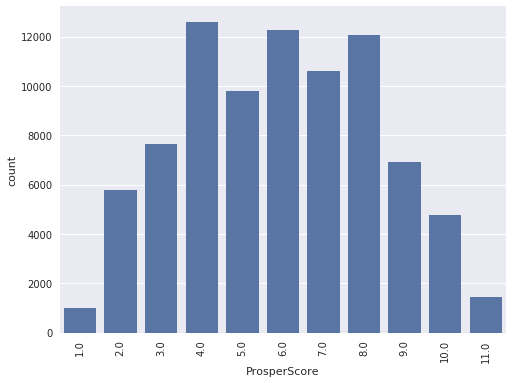

In [21]:
#increase font size of all elements
sns.set(style="darkgrid")
sns.set(font_scale= 1.0)
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'ProsperScore', color = base_color)

plt.xticks(rotation = 90)
plt.show()

In [22]:
def fun(num):
  
    if num == "Completed":
        return "Completed"
    
    elif num =="Defaulted":
        return "Defaulted"
  
    else:
        return "Other"

df["LoanStatus_"] = df["LoanStatus"].apply(fun)

# df[["Term", "LoanStatus_"]].set_index('Term').plot(kind='bar', stacked=True, color=['red', 'pink'])

In [23]:
df["LoanStatus_"].nunique()

3

In [24]:
# df_plot = df.groupby(['Term', "LoanStatus_"]).size().reset_index().pivot(columns='LoanStatus_', index='Term', values=0)
df_plot = df.groupby(['Term'])["LoanStatus_"].value_counts(normalize=True).rename('percentage').mul(100)
# 
df_plot = df_plot.reset_index().pivot(columns='LoanStatus_', index='Term', values= 'percentage')
df_plot

# .plot(kind='bar', stacked=True)

LoanStatus_,Completed,Defaulted,Other
Term,,,
12,89.832610,0.619963,9.547427
36,26.904859,1.378382,71.716759
60,9.876141,0.757823,89.366037


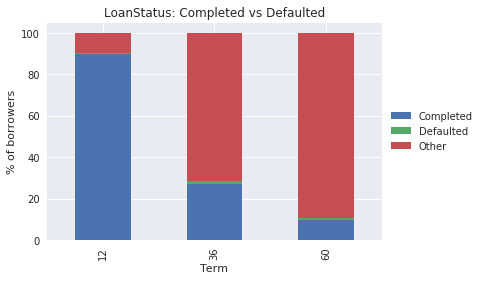

In [25]:
plt.figure(figsize=(20, 10))
# df_plot.plot(kind='bar', stacked=True)
df_plot.plot.bar(stacked=True)
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("LoanStatus: Completed vs Defaulted")
plt.ylabel('% of borrowers')
plt.show()

We can see that there is a trend in the of LoanStatus of Completed and Defaulted 

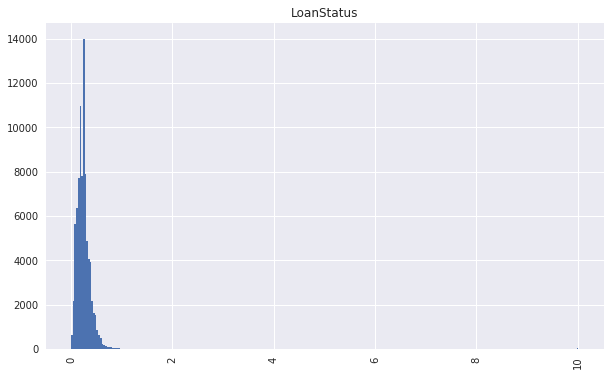

In [26]:
sns.set(font_scale= 1.0)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
df['DebtToIncomeRatio'].hist(bins=300)
plt.title("LoanStatus")
plt.show()


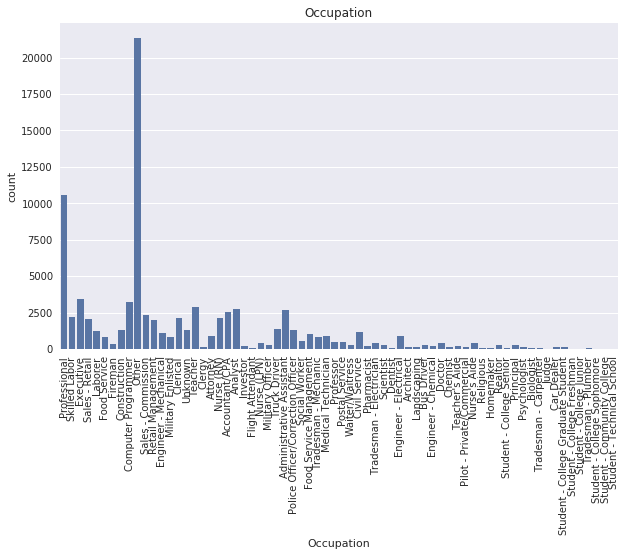

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'Occupation', color = base_color)
plt.title("Occupation")
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

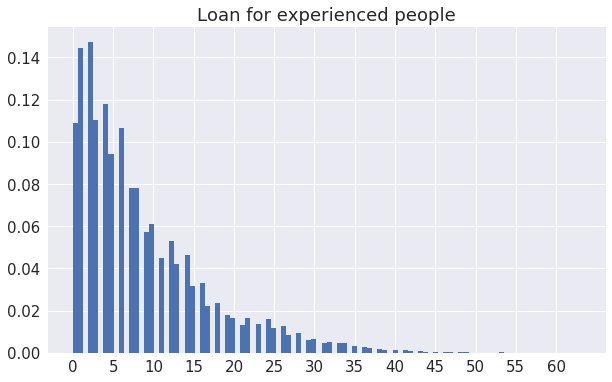

In [28]:
df["EmploymentStatusDuration_y"] = df["EmploymentStatusDuration"]/12
df["EmploymentStatusDuration_y"] = df["EmploymentStatusDuration_y"].round()

sns.set(font_scale= 1.5)
plt.figure(figsize=(10,6))
df["EmploymentStatusDuration_y"].hist(bins =100, density = 1,)
plt.title("Loan for experienced people")
plt.xticks(np.arange(min(df["EmploymentStatusDuration_y"]), max(df["EmploymentStatusDuration_y"])+1, 5.0))
plt.show()

### note 
We can see that the more experience people gain on the job, the less likely they are to choose to borrow.

## Bivariate Exploration


> Distribution of EstimatedEffectiveYield depending on the different ProsperScore

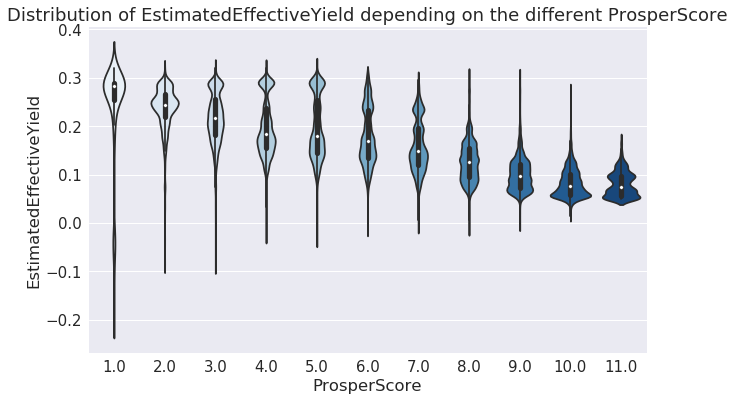

In [29]:
#increase font size of all elements
sns.set(font_scale= 1.5)
plt.figure(figsize=(10,6))
sns.violinplot(data=df,  x ="ProsperScore", y ="EstimatedEffectiveYield", palette="Blues")
# displaying the title
plt.title("Distribution of EstimatedEffectiveYield depending on the different ProsperScore")
plt.show()

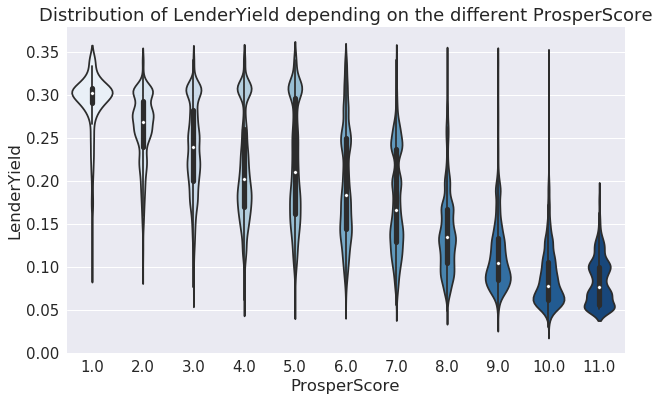

In [30]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,  x ="ProsperScore", y ="LenderYield", palette="Blues")
plt.title("Distribution of LenderYield depending on the different ProsperScore")
plt.show()

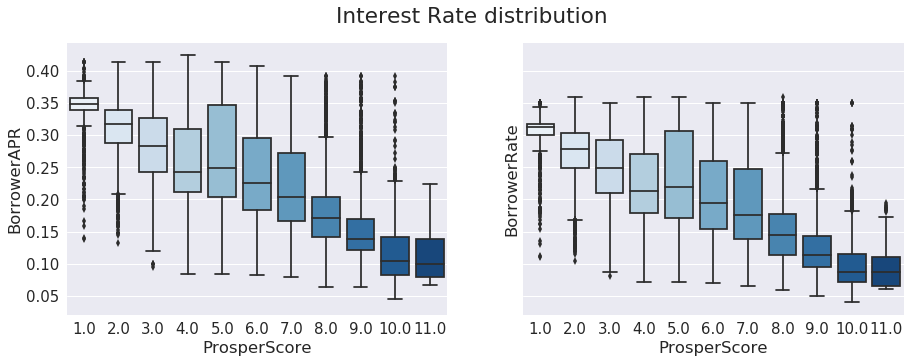

In [31]:
# plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Interest Rate distribution')

sns.boxplot(data=df,  x ="ProsperScore", y="BorrowerAPR", ax=axes[0], palette="Blues")

sns.boxplot(data=df,  x ="ProsperScore", y="BorrowerRate", ax=axes[1], palette="Blues")
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.show()

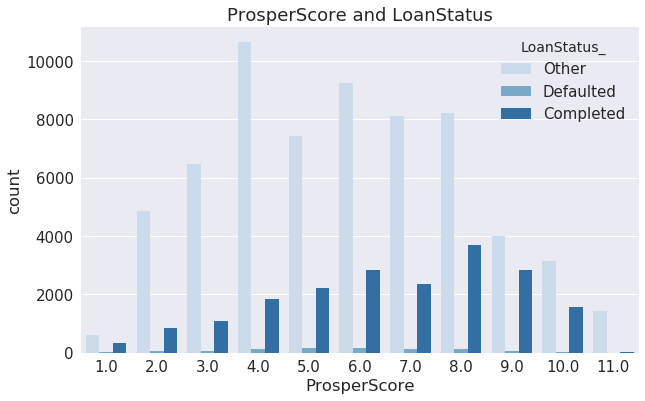

In [32]:
plt.figure(figsize = [10, 6])
plt.title('ProsperScore and LoanStatus')
sns.countplot(data = df, x = 'ProsperScore', hue = 'LoanStatus_', palette = 'Blues')
plt.show()

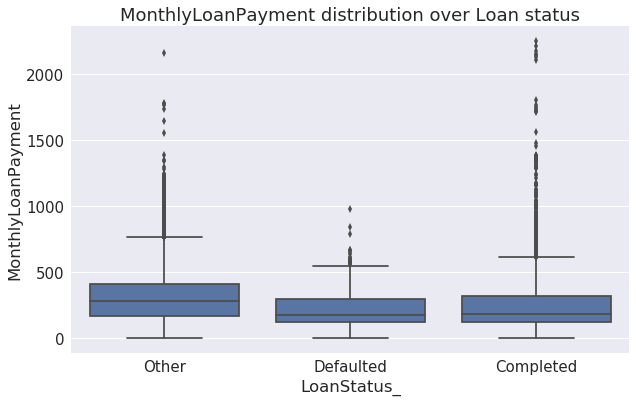

In [33]:
plt.figure(figsize = [10, 6])
plt.title('MonthlyLoanPayment distribution over Loan status')
sns.boxplot(data = df, x = 'LoanStatus_', y = 'MonthlyLoanPayment', color = base_color)
plt.show()

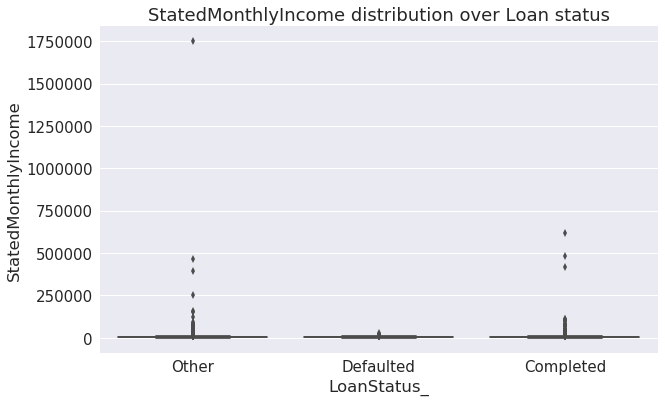

In [34]:
plt.figure(figsize = [10, 6])
plt.title('StatedMonthlyIncome distribution over Loan status')
sns.boxplot(data = df, x = 'LoanStatus_', y = 'StatedMonthlyIncome', color = base_color)
plt.show()


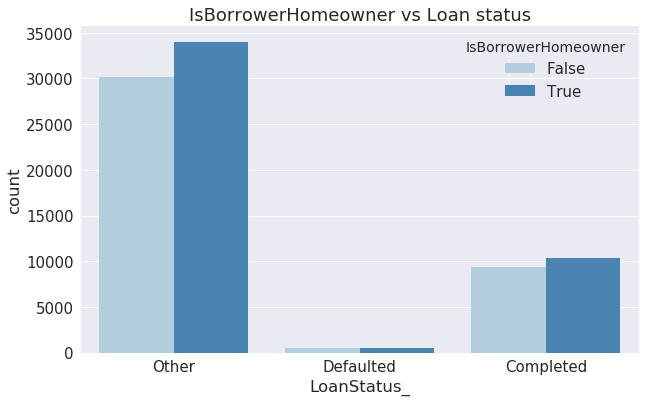

In [35]:
plt.figure(figsize = [10, 6])
plt.title('IsBorrowerHomeowner vs Loan status')
sns.countplot(data = df, x = 'LoanStatus_', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.show()

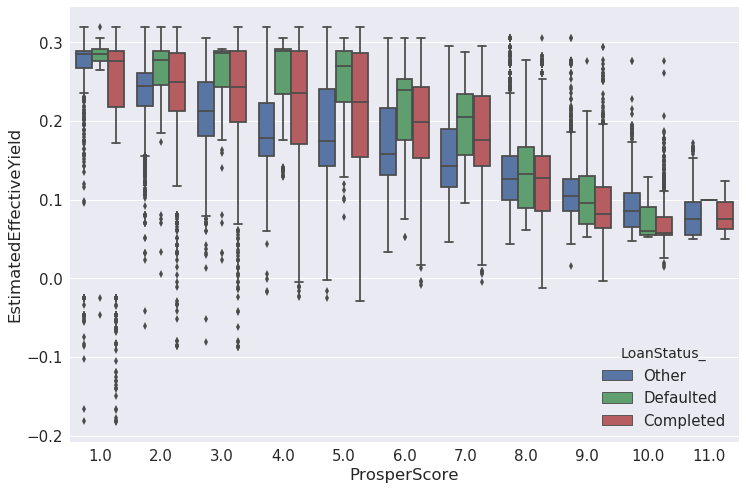

In [36]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=df, x='ProsperScore', y='EstimatedEffectiveYield', hue='LoanStatus_')
plt.show()

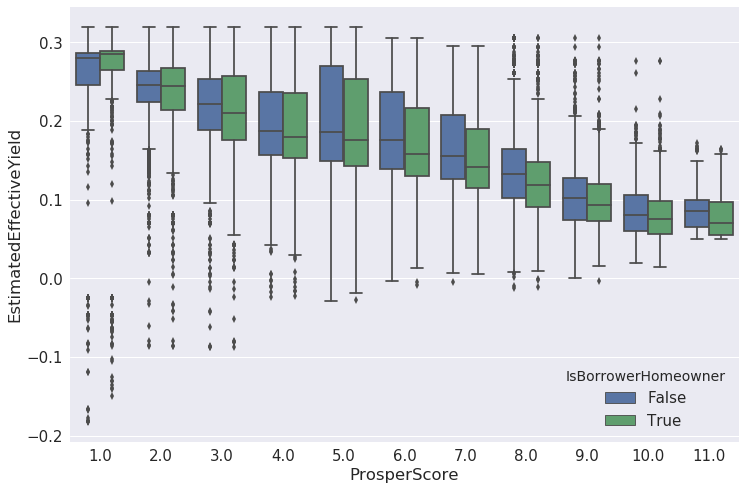

In [37]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=df, x='ProsperScore', y='EstimatedEffectiveYield', hue='IsBorrowerHomeowner')
plt.show()

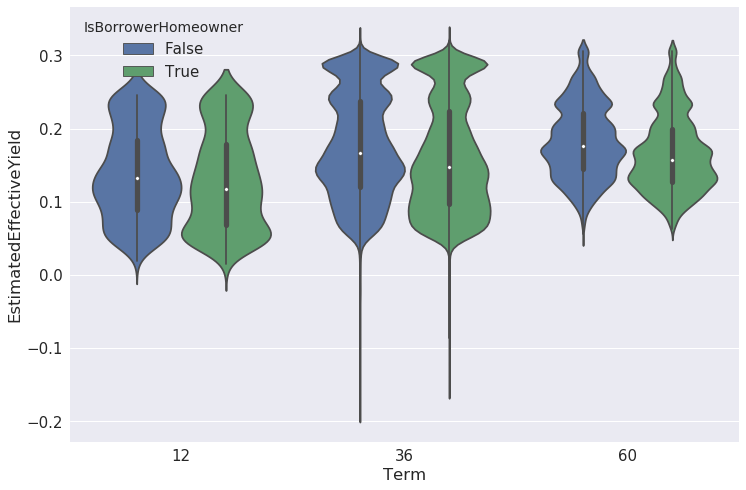

In [38]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=df, x='Term', y='EstimatedEffectiveYield', hue='IsBorrowerHomeowner')
plt.show()

### Note

We can see that borrowers with poor prospects are subject to higher interest rates than borrowers with better prospects.

In [39]:
# tip

> Relation between StatedMonthlyIncome and MonthlyLoanPayment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We can see that there is a trend in the of LoanStatus of Completed and Other but we see any trend in Defaulted though

We can see that the more experience people gain on the job, the less likely they are to choose to borrow.

We can see that borrowers with poor prospects are subject to higher interest rates than borrowers with better prospects.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between "ProsperScore" and "BorrowerAPR" is interested 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

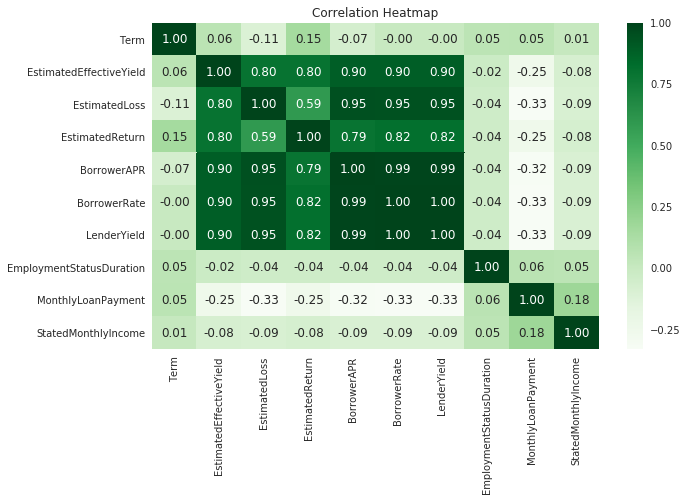

In [40]:
# plotting correlation heatmap
plt.style.use('seaborn-talk')
sns.set(font_scale= 1.0)
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sub_df = df[["Term", "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn", "BorrowerAPR", "BorrowerRate", 
             "LenderYield","EmploymentStatusDuration", "MonthlyLoanPayment", "StatedMonthlyIncome"]]
dataplot = sns.heatmap(sub_df.corr(), cmap="Greens", square=False,  annot=True, fmt='.2f' )
  
# displaying heatmap
plt.show()

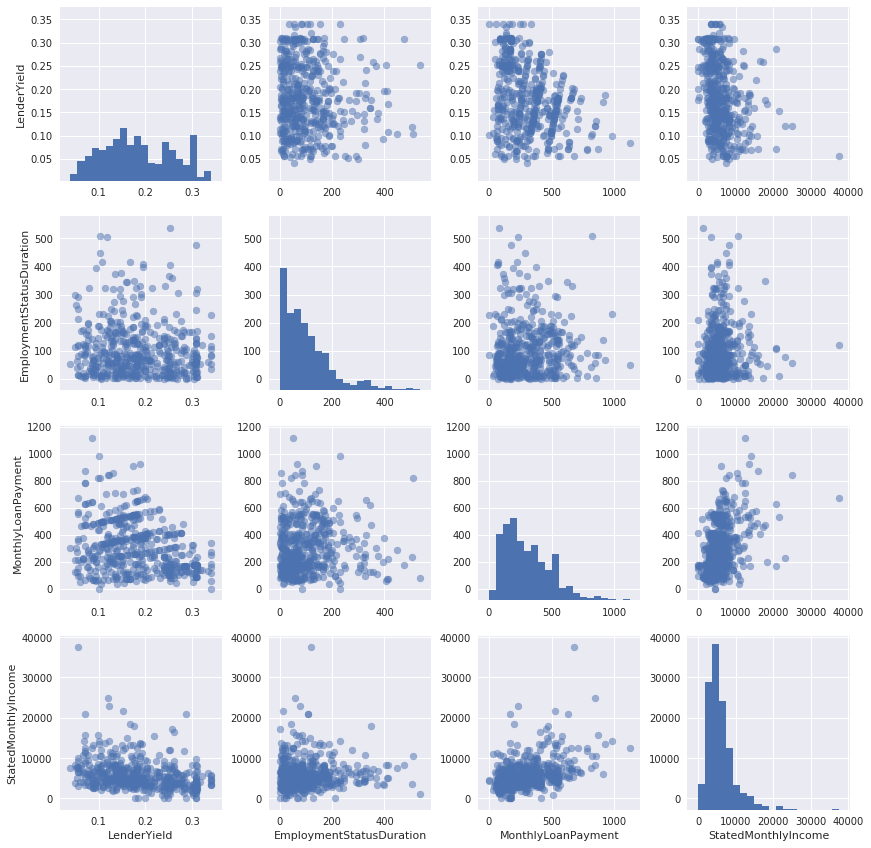

In [41]:
# plot matrix: sample 500 loans so that plots are clearer
sub_df = df[[ "LenderYield","EmploymentStatusDuration", "MonthlyLoanPayment", "StatedMonthlyIncome"]]
samples = np.random.choice(sub_df.shape[0], 500, replace = False)
df_samp = sub_df.reindex(samples)

# pair grid
g = sns.PairGrid(data = df_samp,  size = 3)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);

### Notes

As expected, the BorrowerRate" and "LenderYield" are highly and positively correlated with one another.

The other strong relationship is between BorrowerRate and Borrower APR.

Moreover, there is a moderate and negative correlation between MonthlyLoanPayment and BorrowerRate/LenderYield.

Most of the remaining variables doesn't present a strong correlation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As expected, the BorrowerRate" and "LenderYield" are highly and positively correlated with one another.

The other strong relationship is between BorrowerRate and Borrower APR.

Moreover, there is a moderate and negative correlation between MonthlyLoanPayment and BorrowerRate/LenderYield.

Most of the remaining variables doesn't present a strong correlation.

### Were there any interesting or surprising interactions between features?

I expected that there is a relationship between EmploymentStatusDuration" and "MonthlyLoanPayment but their correlation value is insignificant 

## Conclusions

The Multivariate Exploration shows that the BorrowerRate" and "LenderYield" are highly and positively correlated with one another. The other strong relationship is between BorrowerRate and Borrower APR. Moreover, there is a moderate and negative correlation between MonthlyLoanPayment and BorrowerRate/LenderYield. Most of the remaining variables doesn't present a strong correlation.

We can see that the more experience people gain on the job, the less likely they are to choose to borrow.

We can see that borrowers with poor prospects are subject to higher interest rates than borrowers with better prospects.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [42]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0